In [8]:
import os
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Read dataset to a dataframe
df = pd.read_csv('final.csv')

df

,year,city,season,area(hec),production(MT),tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility
0,2009,Kurunegala,1,491,1695,31.426257,21.556983,27.377654,35.978212,21.556983,29.975978,22.402235,75.672737,20.652514,169.201117,1009.093296,45.236872,11.863128
1,2009,Kurunegala,2,384,3648,30.735119,21.498810,27.035714,35.520833,21.498810,29.496429,23.038690,79.574762,19.487500,187.786905,1009.424405,57.911310,12.922024
2,2010,Kurunegala,1,504,1715,32.743094,21.376796,27.580110,37.991160,21.376796,30.455249,22.895580,77.036298,20.113260,164.210497,1009.548619,50.776796,13.509392
3,2010,Kurunegala,2,414,3929,30.269022,21.120109,26.505435,34.859783,21.120109,28.627717,22.838587,80.983152,19.066304,202.689674,1008.176087,67.685870,13.566304
4,2011,Kurunegala,1,496,1587,31.633523,21.084659,27.017045,36.293750,21.084659,29.450568,22.651136,78.151420,20.335795,165.268750,1008.642045,60.318750,13.209659
5,2011,Kurunegala,2,396,3762,31.301087,21.345652,27.027174,35.679348,21.345652,29.337500,22.672283,77.987337,20.341848,186.993478,1008.439130,62.853261,13.284239
6,2012,Kurunegala,1,420,1344,32.414835,20.835165,27.247253,36.689011,20.835165,29.595055,22.180220,75.283846,20.842308,173.511539,1008.850549,51.358791,13.241758
7,2012,Kurunegala,2,272,2584,31.322826,21.019565,26.778804,35.938043,21.019565,28.992935,22.760326,79.582120,20.442391,183.620109,1008.765217,64.993478,13.327174
8,2013,Kurunegala,1,361,1179,31.703333,21.103333,27.087222,36.800556,21.103333,29.601111,22.750556,78.392667,19.311111,164.895556,1009.108333,58.323333,13.430556
9,2013,Kurunegala,2,396,3762,30.721196,20.969022,26.622283,35.255435,20.969022,28.752174,22.666848,79.684348,19.844022,186.991848,1008.805435,62.385326,12.775543


In [11]:
df= df.drop(['city','year'], axis=1)

In [12]:
df

,season,area(hec),production(MT),tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility
0,1,491,1695,31.426257,21.556983,27.377654,35.978212,21.556983,29.975978,22.402235,75.672737,20.652514,169.201117,1009.093296,45.236872,11.863128
1,2,384,3648,30.735119,21.498810,27.035714,35.520833,21.498810,29.496429,23.038690,79.574762,19.487500,187.786905,1009.424405,57.911310,12.922024
2,1,504,1715,32.743094,21.376796,27.580110,37.991160,21.376796,30.455249,22.895580,77.036298,20.113260,164.210497,1009.548619,50.776796,13.509392
3,2,414,3929,30.269022,21.120109,26.505435,34.859783,21.120109,28.627717,22.838587,80.983152,19.066304,202.689674,1008.176087,67.685870,13.566304
4,1,496,1587,31.633523,21.084659,27.017045,36.293750,21.084659,29.450568,22.651136,78.151420,20.335795,165.268750,1008.642045,60.318750,13.209659
5,2,396,3762,31.301087,21.345652,27.027174,35.679348,21.345652,29.337500,22.672283,77.987337,20.341848,186.993478,1008.439130,62.853261,13.284239
6,1,420,1344,32.414835,20.835165,27.247253,36.689011,20.835165,29.595055,22.180220,75.283846,20.842308,173.511539,1008.850549,51.358791,13.241758
7,2,272,2584,31.322826,21.019565,26.778804,35.938043,21.019565,28.992935,22.760326,79.582120,20.442391,183.620109,1008.765217,64.993478,13.327174
8,1,361,1179,31.703333,21.103333,27.087222,36.800556,21.103333,29.601111,22.750556,78.392667,19.311111,164.895556,1009.108333,58.323333,13.430556
9,2,396,3762,30.721196,20.969022,26.622283,35.255435,20.969022,28.752174,22.666848,79.684348,19.844022,186.991848,1008.805435,62.385326,12.775543


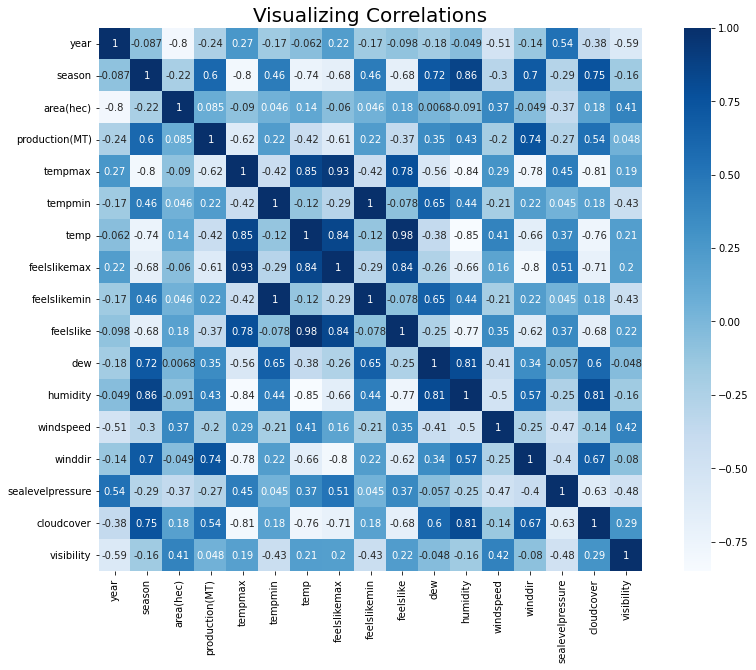

In [6]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

In [13]:
list(df)

['season',
 'area(hec)',
 'production(MT)',
 'tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'windspeed',
 'winddir',
 'sealevelpressure',
 'cloudcover',
 'visibility']

In [14]:
X = df[['season', 'area(hec)','tempmax','tempmin','temp','feelslikemax','feelslikemin','feelslike','dew','humidity','windspeed','winddir','sealevelpressure','cloudcover','visibility']].values

#X = df.iloc[:, 1:].values

y = df['production(MT)'].values

In [15]:
X

array([[1.00000000e+00, 4.91000000e+02, 3.14262570e+01, 2.15569832e+01,
        2.73776536e+01, 3.59782123e+01, 2.15569832e+01, 2.99759777e+01,
        2.24022346e+01, 7.56727374e+01, 2.06525140e+01, 1.69201117e+02,
        1.00909330e+03, 4.52368715e+01, 1.18631285e+01],
       [2.00000000e+00, 3.84000000e+02, 3.07351191e+01, 2.14988095e+01,
        2.70357143e+01, 3.55208333e+01, 2.14988095e+01, 2.94964286e+01,
        2.30386905e+01, 7.95747619e+01, 1.94875000e+01, 1.87786905e+02,
        1.00942440e+03, 5.79113095e+01, 1.29220238e+01],
       [1.00000000e+00, 5.04000000e+02, 3.27430939e+01, 2.13767956e+01,
        2.75801105e+01, 3.79911602e+01, 2.13767956e+01, 3.04552486e+01,
        2.28955801e+01, 7.70362983e+01, 2.01132597e+01, 1.64210497e+02,
        1.00954862e+03, 5.07767956e+01, 1.35093923e+01],
       [2.00000000e+00, 4.14000000e+02, 3.02690217e+01, 2.11201087e+01,
        2.65054348e+01, 3.48597826e+01, 2.11201087e+01, 2.86277174e+01,
        2.28385870e+01, 8.09831522e+0

In [16]:
y

array([1695, 3648, 1715, 3929, 1587, 3762, 1344, 2584, 1179, 3762,  966,
       3857, 1077, 1433, 2831, 3123, 2718, 1919,  966, 2141])

In [17]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [18]:
predicted_CR = regr.predict([[1,491,31.426257,21.556983,	27.377654,	35.978212,	21.556983,	29.975978,	22.402235,	75.672737,	20.652514,	169.201117, 1009.093296,	45.236872,	11.863128 ]])

In [19]:
predicted_CR

array([1657.69763433])

In [ ]:
0.074	203.00	5.0	6.0	61.9	62.1	8.17	8.16	7.0

In [ ]:
predicted_CR = regr.predict([[0.074,203.00,5.0,6.0,61.9,62.1,8.17,8.16,7.0 ]])
predicted_CR

array([0.82697588])